In [1]:
%matplotlib inline

### data set path

In [2]:
path = "../data/dogscats/sample/"

### import some libraries
common to alias numpy as np

In [3]:
from __future__ import division, print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [4]:
import utils; reload(utils)
from utils import plots

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


### using the vgg model

batch size controls number of images retrieved

In [13]:
batch_size = 4

In [6]:
from vgg16 import Vgg16

In [7]:
vgg = Vgg16()

In [8]:
batches = vgg.get_batches(path +'train', batch_size = batch_size)
val_batches = vgg.get_batches(path + 'valid', batch_size = batch_size * 2)

Found 16 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [9]:
imgs,labels = next(batches)

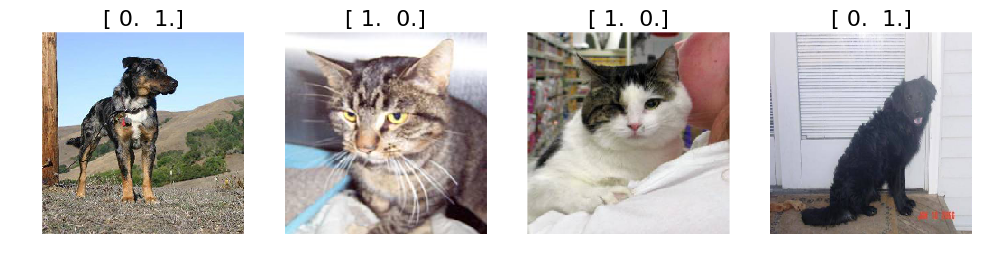

In [10]:
plots(imgs, titles=labels)

#### predict
what is this??

In [11]:
vgg.predict(imgs, True)

(array([ 0.1634,  0.7001,  0.1022,  0.4821], dtype=float32),
 array([234, 281, 728, 233]),
 [u'Rottweiler', u'tabby', u'plastic_bag', u'Bouvier_des_Flandres'])

#### finetune
keep learned filters, learn to combine most complex filters to find specific subject info

#### fit
shows the value of the loss function and the accuracy after every epoch
most important metrics are validation set, check for over-fitting

In [12]:
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch = 1)

Epoch 1/1
16/16 [==============================] - 1s - loss: 1.8186 - acc: 0.4375 - val_loss: 1.2320 - val_acc: 0.6250


#### save weights

In [14]:
vgg.model.save_weights(path + 'results/ft1.h5')

#### refining the result accuracy

In [15]:
vgg.fit(batches, val_batches, nb_epoch = 1)
vgg.model.save_weights(path + 'results/ft2.h5')

Epoch 1/1
16/16 [==============================] - 0s - loss: 0.4853 - acc: 0.8125 - val_loss: 0.9552 - val_acc: 0.7500


In [16]:
vgg.fit(batches, val_batches, nb_epoch = 1)
vgg.model.save_weights(path + 'results/ft2_1.h5')

Epoch 1/1
16/16 [==============================] - 0s - loss: 0.0249 - acc: 1.0000 - val_loss: 0.5939 - val_acc: 0.7500


#### change learning rate
changing learning rate from .1 to .01 halfway through refinement, this is often a good idea

In [17]:
vgg.fit(batches, val_batches, nb_epoch = 1)
vgg.model.save_weights(path + 'results/ft2_2.h5')

Epoch 1/1
16/16 [==============================] - 0s - loss: 0.0010 - acc: 1.0000 - val_loss: 0.4393 - val_acc: 0.8750


In [18]:
vgg.fit(batches, val_batches, nb_epoch = 1)
vgg.model.save_weights(path + 'results/ft2_3.h5')

Epoch 1/1
16/16 [==============================] - 0s - loss: 0.0079 - acc: 1.0000 - val_loss: 0.3959 - val_acc: 0.8750


(array([ 1.    ,  0.9999,  0.9996,  1.    ], dtype=float32),
 array([1, 0, 0, 1]),
 ['dogs', 'cats', 'cats', 'dogs'])

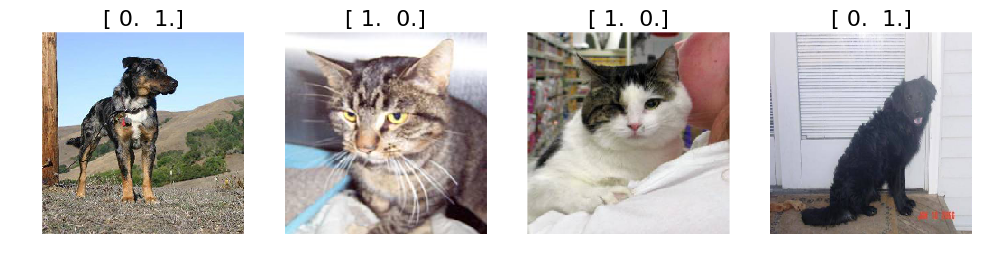

In [19]:
plots(imgs, titles=labels)
vgg.predict(imgs, True)